<a href="https://colab.research.google.com/github/karanbhatt1/MachineLearning/blob/main/Wallmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 """Problem Statement:
 A retail store that has multiple outlets across the country are facing issues in managing the
 inventory - to match the demand with respect to supply."""

In [298]:
## Dataset Description:

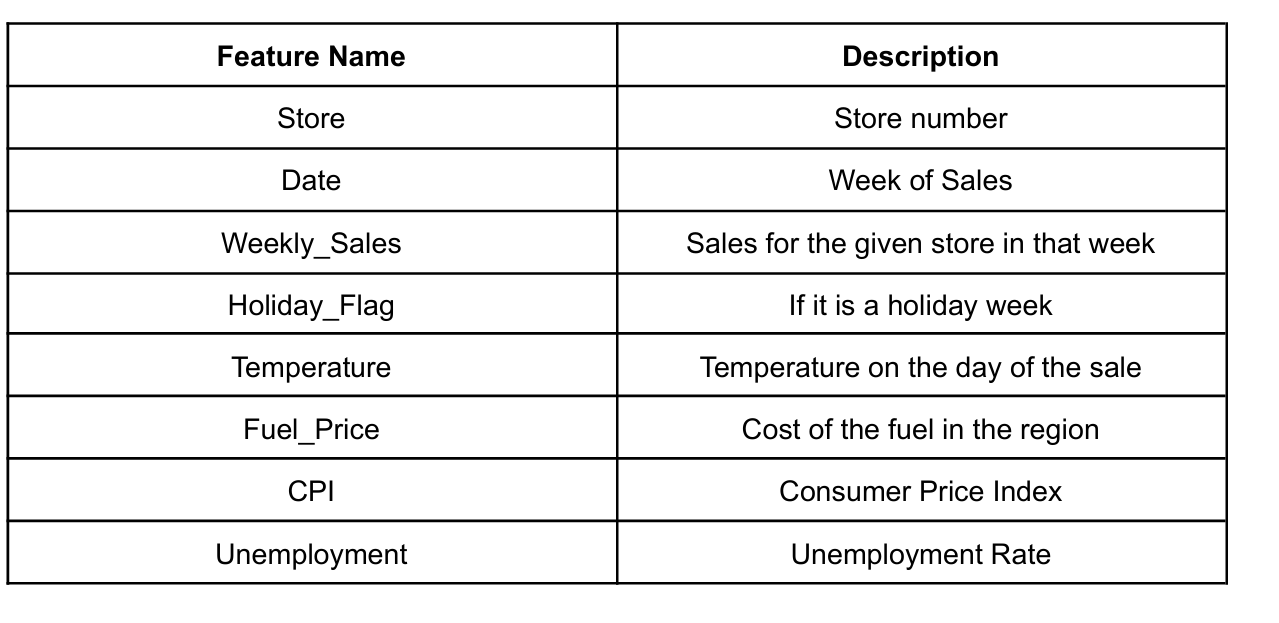

In [299]:
#mounting drive in google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [300]:
# Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [301]:
# reading the dataset

data_set = pd.read_csv("/content/drive/MyDrive/Dataset/Walmart DataSet.csv")

In [302]:
data_set.shape

(6435, 8)

In [303]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [304]:
data_set.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [305]:
data_set["Date"] = pd.to_datetime(data_set["Date"],format="%d-%M-%Y")

In [306]:
#1. If the weekly sales are affected by the unemployment rate, if yes - which stores
# are suffering the most?
correlation = data_set["Weekly_Sales"].corr(data_set["Unemployment"])
print(f"Corelation:{correlation:.5f}")
# finding correlation of between "Weekly_Sales" And "Unemployment" for each store
store_corr = data_set.groupby('Store').apply(lambda x: x['Weekly_Sales'].corr(x["Unemployment"])).reset_index(name="Correlation")
store_corr = store_corr.sort_values(by="Correlation")
most_suffering = store_corr[(store_corr["Correlation"]<-0.09)]
lis = list(most_suffering["Store"])
""" ANS:"""
print("The most suffering stoes are :",lis)


Corelation:-0.10618
The most suffering stoes are : [38, 44, 39, 42, 41, 4, 17, 3, 37, 5, 43, 9, 13, 7, 40, 32, 1, 20]


In [307]:
data_set["Store"].nunique() # There are total 45 stores numbered 1 - 45
""" Creating a function to take user input the store no """

' Creating a function to take user input the store no '

# Functions For DataCleaning:

In [308]:
def storeData(data_set):
  storeNo = int(input("Enter the store number to get data:"))
  store = data_set[(data_set['Store'] == storeNo)]
  sales = pd.DataFrame(store["Weekly_Sales"].groupby(store.Date).sum())
  sales = sales.reset_index()
  #reseting indexes to structure the header and data
  return sales

In [309]:
## Stored all the stores data in the list:
def makeSeprate(data_set):
  lis = []
  for i in range(1,data_set["Store"].nunique()+1):
    sd = data_set[(data_set['Store'] == i)]
    sales = pd.DataFrame(sd["Weekly_Sales"].groupby(sd.Date).sum())
    processed = cleanData(sales)
    lis.append(processed)
  return lis

>2.If the weekly sales show a seasonal trend, when and what could be the reason?

#EDA





In [310]:
# Null values
# duplicates
# missing

data_set.isnull().sum().sum()  # No null values are present
data_set.duplicated().sum().sum() # No duplicate values.
# No Missing  Values Found in data

np.int64(0)

In [311]:
lis = makeSeprate(data_set)

# Visualization for each store

In [312]:
def plot_all_weekly_sales(store_list):
    fig, axs = plt.subplots(15, 3, figsize=(18,60))  # 9 rows × 5 columns
    fig.suptitle("Weekly Sales Across All Stores", fontsize=20, y=1.02)
    # Flatten the 2D array of axes for easy iteration
    axs = axs.flatten() # converting to 1d array for simple iteration

    for i, store_df in enumerate(store_list):
        if i >= len(axs):
            break  # In case store_list has more than 45 stores

        axs[i].plot(store_df['Date'], store_df['Weekly_Sales'], color='blue')
        axs[i].set_title(f'Store {i+1}', fontsize=10)
        axs[i].tick_params(axis='x', labelrotation=45)
        axs[i].grid(True)

    # Remove any empty subplots if list is < 45
    for j in range(len(store_list), len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()


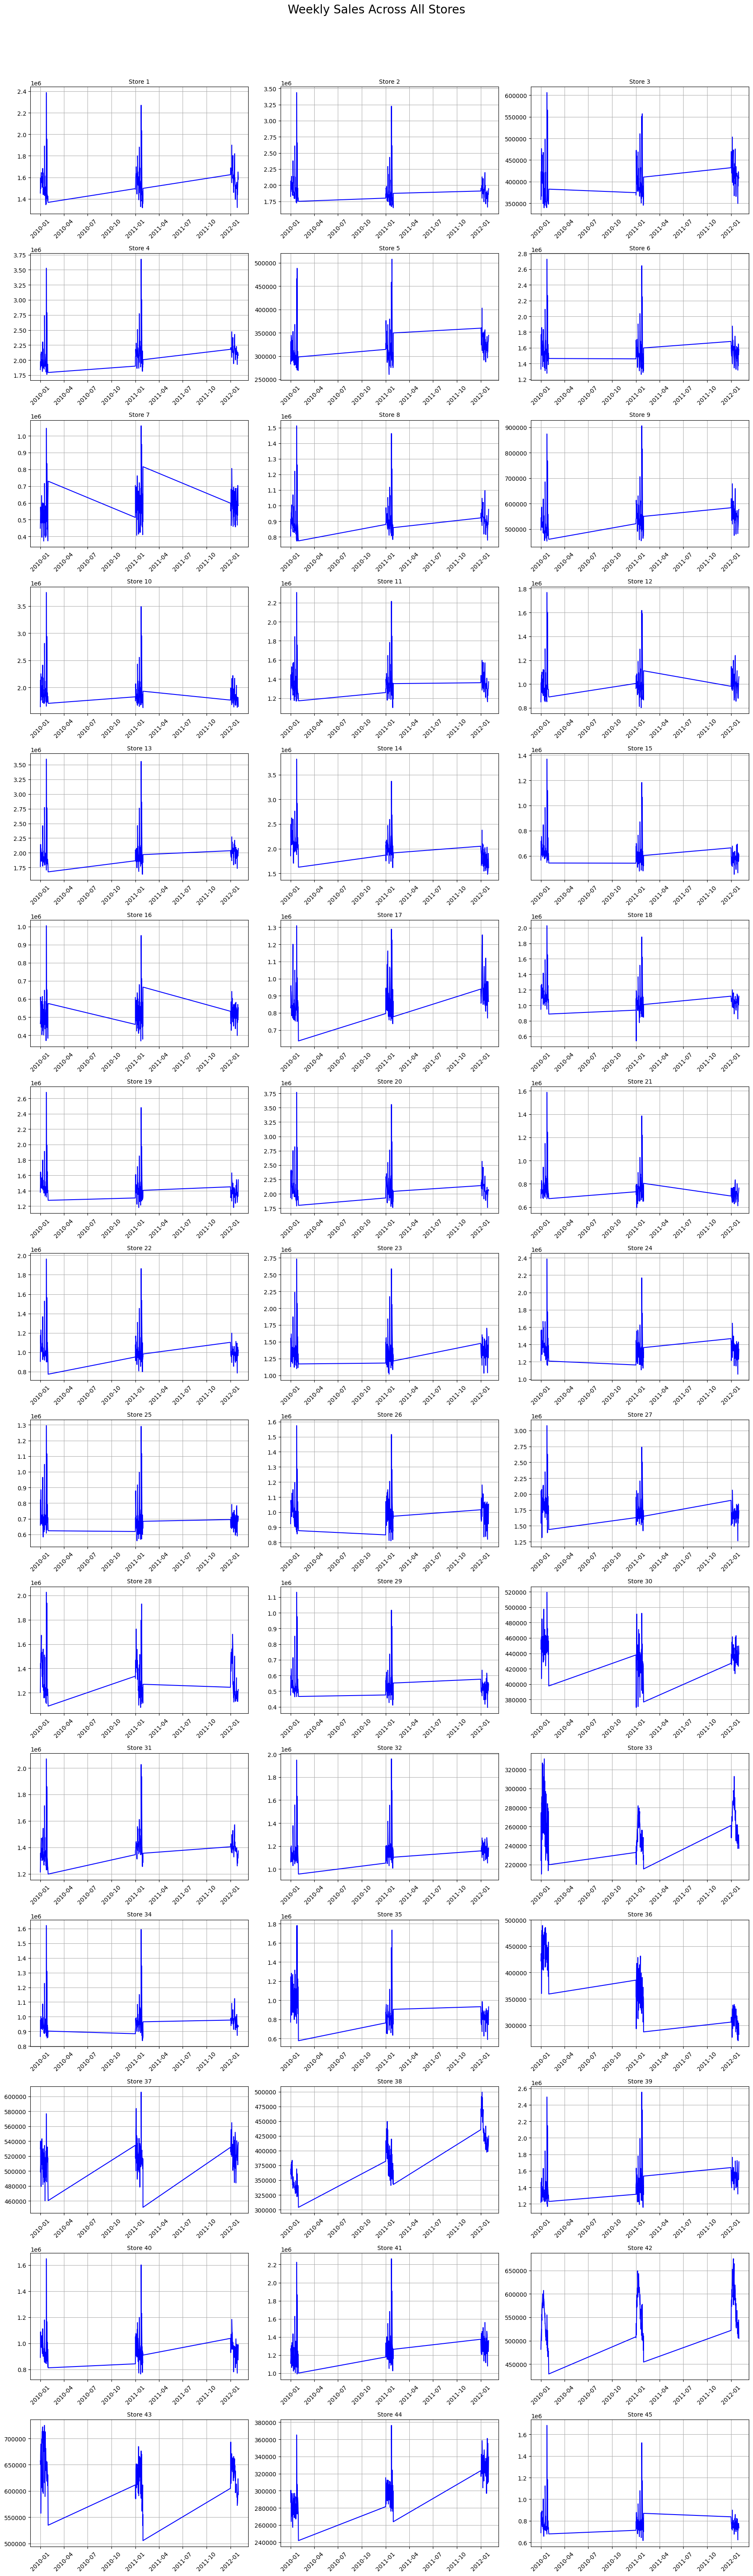

In [313]:
## In Python, enumerate() is a built-in function that
## lets you loop through an iterable (like a list or DataFrame)
## while keeping track of the index of each item
plot_all_weekly_sales(lis)

#Questions:


In [314]:
""" 2. """
#if the weekly sales show a seasonal trend, when and what could be the reason?

"""ANS:""" # Yes , There is a seasonal trend at begining of every year. i.e.
# (2010-01) ,(2011-01), (2012-01).
# This trend may be due to new year sale/ or any offer.
# Due to new year.

'ANS:'

In [315]:
""" 3 """
#  Does temperature affect the weekly sales in any manner?

"""ANS:"""
cortemp = data_set['Temperature'].corr(data_set["Weekly_Sales"])
print(f"Temperature vs Correlation: {cortemp:.3f}")

store_temp_corr = data_set.groupby("Store").apply(
    lambda x: x["Weekly_Sales"].corr(x["Temperature"])
).reset_index(name="Temp_Correlation")
store_temp_corr.sort_values("Temp_Correlation").head()



# However the correlation  is negative   b/w temperature and weekly sales
# But it's negligible therefore temperature dosen't effect the sales much.
# But for some stores like [10,12,3,28,30] there is minimal effect.

Temperature vs Correlation: -0.064


,Store,Temp_Correlation
9,10,-0.432569
11,12,-0.379416
2,3,-0.377524
27,28,-0.376506
29,30,-0.330816


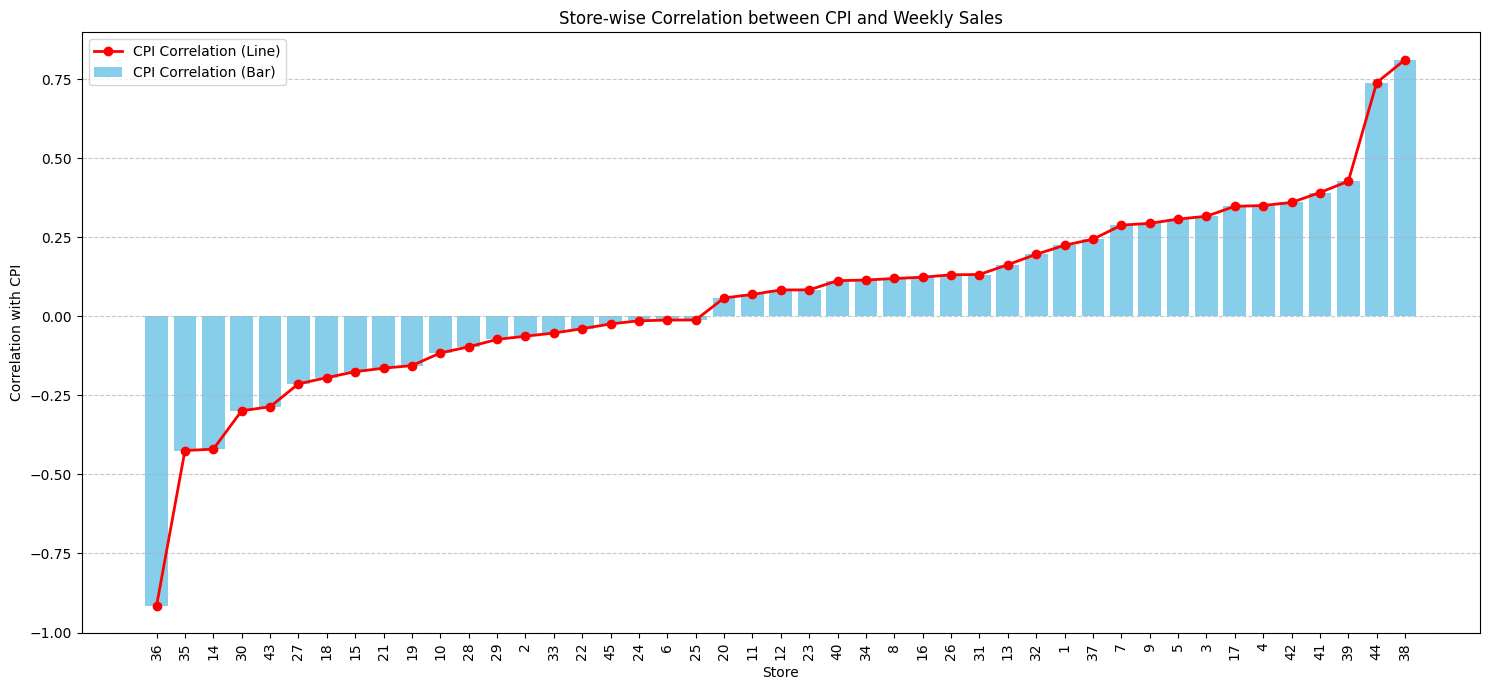

In [316]:
""" 4 """
# How is the Consumer Price index affecting the weekly sales of various stores?
store_CPI_corr = data_set.groupby("Store").apply(
    lambda x: x["Weekly_Sales"].corr(x["CPI"])
).reset_index(name="CPI")


## Store  [36,35,14,30,43,27,18,15,21,19,10]  "have negative  correlation"
## i.e. the more the CPI the less the Sales.

store_CPI_corr_sorted = store_CPI_corr.sort_values("CPI").reset_index(drop=True)

# Create a figure and axis
plt.figure(figsize=(15, 7))

# Bar plot
bars = plt.bar(
    x=store_CPI_corr_sorted.index,
    height=store_CPI_corr_sorted["CPI"],
    color="skyblue",
    label="CPI Correlation (Bar)"
)

# Line plot (over same x-axis)
plt.plot(
    store_CPI_corr_sorted.index,
    store_CPI_corr_sorted["CPI"],
    color="red",
    marker="o",
    linewidth=2,
    label="CPI Correlation (Line)"
)

# Add store labels to x-axis
plt.xticks(store_CPI_corr_sorted.index, store_CPI_corr_sorted["Store"], rotation=90)

# Labels and title
plt.xlabel("Store")
plt.ylabel("Correlation with CPI")
plt.title("Store-wise Correlation between CPI and Weekly Sales")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


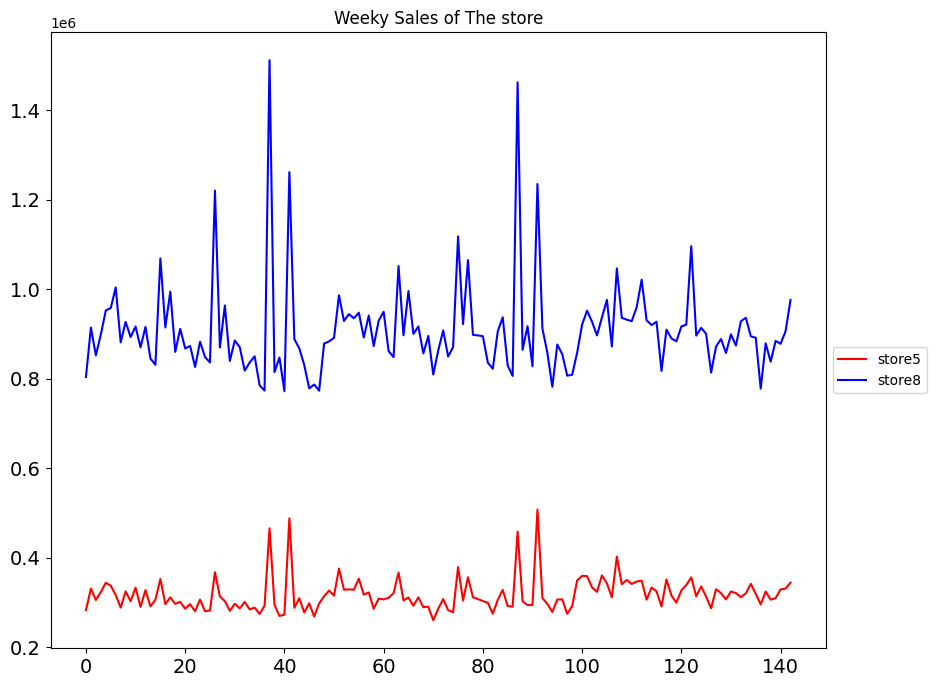

In [317]:
# ploting week_sales on each date to analyze the trend, seasonality or patern
graph = store5["Weekly_Sales"].plot(figsize=(10,8),title='Weeky Sales of The store',fontsize=14, color='red',label='store5')
graph.plot(store8["Weekly_Sales"],color="blue",label='store8')
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
# Top performing stores according to the historical data.

In [ ]:
# The worst performing store, and how significant is the difference between the
# highest and lowest performing stores.

In [ ]:
sales = pd.DataFrame(storedata["Weekly_Sales"].groupby(storedata.Date).sum())

In [ ]:
sales.dtypes

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompostion = seasonal_decompose(store5.Weekly_Sales, period=15)
fig = plt.figure()
fig = decompostion.plot()
fig.set_size_inches(12,10)
plt.show()

In [ ]:
sales.info()

In [ ]:
plt.plot(storedata["Weekly_Sales"])

In [ ]:
#performing EDA:

In [ ]:
plt.plot(data_set['Weekly_Sales'])